# COVID-19 Time Series CSV Analysis US

In [20]:
import matplotlib

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd

import urllib.request

#See:
#https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

#Download the latest CSV file
urllib.request.urlretrieve('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv','Documents/time_series_covid19_confirmed_global.csv')

('Documents/time_series_covid19_confirmed_global.csv',
 <http.client.HTTPMessage at 0x25ef62e1dc8>)

In [21]:
time_series_file = "Documents/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(time_series_file)
print(df.head())

  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/14/20  3/15/20  3/16/20  3/17/20  \
0        0        0        0  ...       11       16       21       22   
1        0        0        0  ...       38       42       51       55   
2        0        0        0  ...       37       48       54       60   
3        0        0        0  ...        1        1        2       39   
4        0        0        0  ...        0        0        0        0   

   3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  
0       22       22   

In [22]:
df.set_index(['Province/State', 'Country/Region'])

Lat        Long  1/22/20  1/23/20  \
Province/State Country/Region                                            
NaN            Afghanistan     33.000000   65.000000        0        0   
               Albania         41.153300   20.168300        0        0   
               Algeria         28.033900    1.659600        0        0   
               Andorra         42.506300    1.521800        0        0   
               Angola         -11.202700   17.873900        0        0   
...                                  ...         ...      ...      ...   
               Grenada         12.116500  -61.679000        0        0   
               Mozambique     -18.665695   35.529562        0        0   
               Syria           34.802075   38.996815        0        0   
               Timor-Leste     -8.874217  125.727539        0        0   
               Belize          13.193900  -59.543200        0        0   

                               1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Province/State Country/Region                                                
NaN            Afghanistan           0        0        0        0        0   
               Albania               0        0        0        0        0   
               Algeria               0        0        0        0        0   
               Andorra               0        0        0        0        0   
               Angola                0        0        0        0        0   
...                                ...      ...      ...      ...      ...   
               Grenada               0        0        0        0        0   
               Mozambique            0        0        0        0        0   
               Syria                 0        0        0        0        0   
               Timor-Leste           0        0        0        0        0   
               Belize                0        0        0        0        0   

                               1/29/20  ...  3/14/20  3/15/20  3/16/20  \
Province/State Country/Region           ...                              
NaN            Afghanistan           0  ...       11       16       21   
               Albania               0  ...       38       42       51   
               Algeria               0  ...       37       48       54   
               Andorra               0  ...        1        1        2   
               Angola                0  ...        0        0        0   
...                                ...  ...      ...      ...      ...   
               Grenada               0  ...        0        0        0   
               Mozambique            0  ...        0        0        0   
               Syria                 0  ...        0        0        0   
               Timor-Leste           0  ...        0        0        0   
               Belize                0  ...        0        0        0   

                               3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  \
Province/State Country/Region                                                
NaN            Afghanistan          22       22       22       24       24   
               Albania              55       59       64       70       76   
               Algeria              60       74       87       90      139   
               Andorra              39       39       53       75       88   
               Angola                0        0        0        1        2   
...                                ...      ...      ...      ...      ...   
               Grenada               0        0        0        0        0   
               Mozambique            0        0        0        0        0   
               Syria                 0        0        0        0        0   
               Timor-Leste           0        0        0        0        0   
               Belize                0        0        0        0        0   

                               3/22/20  3/23/20  
Province/State Country/Region  

In [23]:
#Read the dates from the headers
headers = list(df.columns.values)
del headers[0:43]
print(headers)

['3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20']


In [24]:
df.loc[df['Country/Region'] == 'US']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,2727,3499,4632,6421,7783,13677,19100,25489,33276,43847


In [25]:
rownum = df.loc[df['Country/Region'] == 'US'].index[0]
print(rownum)

225


In [26]:
#dates = ['3/1/20','3/2/20','3/3/20','3/4/20','3/5/20','3/6/20','3/7/20','3/8/20','3/9/20','3/10/20','3/11/20','3/12/20','3/13/20','3/14/20','3/15/20','3/16/20','3/17/20','3/18/20','3/19/20','3/20/20','3/21/20','3/22/20']
#cases = df.loc[226, '3/1/20':'3/22/20']
dates = headers
cases = df.loc[rownum, dates[0]:dates[-1]]
state = df.loc[rownum, 'Province/State':'Country/Region']

print(state,dates,cases)


Province/State    NaN
Country/Region     US
Name: 225, dtype: object ['3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20'] 3/1/20        74
3/2/20        98
3/3/20       118
3/4/20       149
3/5/20       217
3/6/20       262
3/7/20       402
3/8/20       518
3/9/20       583
3/10/20      959
3/11/20     1281
3/12/20     1663
3/13/20     2179
3/14/20     2727
3/15/20     3499
3/16/20     4632
3/17/20     6421
3/18/20     7783
3/19/20    13677
3/20/20    19100
3/21/20    25489
3/22/20    33276
3/23/20    43847
Name: 225, dtype: object


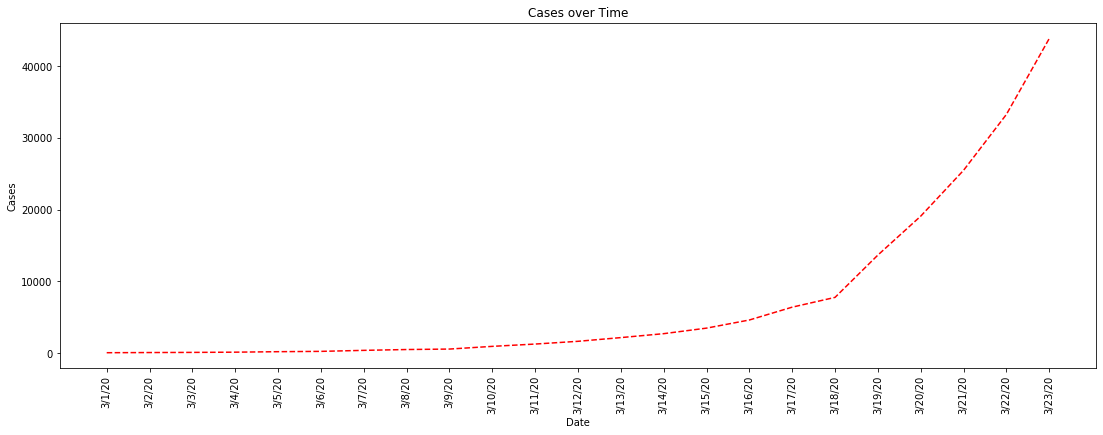

In [27]:
fig = plt.figure(figsize=(18,6))
axes = fig.add_axes([0,0,0.8,0.8])

axes.plot(dates, cases, 'r--') # Create line plot with red dashed line
plt.title('Cases over Time')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.xticks(rotation=90)
plt.show()

In [28]:
datetimes = [pd.to_datetime(date, infer_datetime_format=True).dayofyear for date in dates]
print(datetimes)

[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]


In [29]:
x = np.array(datetimes)
y = np.array(cases)
x=x.reshape(len(x),1)
y=y.reshape(len(y),1)

#print(x,y)

In [30]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
x_trainp, x_testp, y_trainp, y_testp = train_test_split(x, y, test_size=0.2, random_state=0)

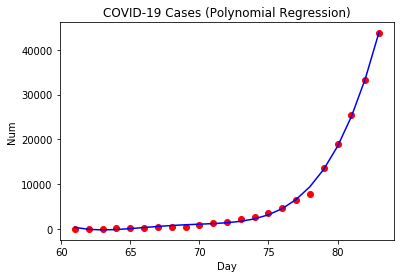

In [31]:
# Fitting Polynomial Regression to the dataset
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(x, y, color='red')
    plt.plot(x, pol_reg.predict(poly_reg.fit_transform(x)), color='blue')
    plt.title('COVID-19 Cases (Polynomial Regression)')
    plt.xlabel('Day')
    plt.ylabel('Num')
    plt.show()
    return
viz_polymonial()

In [32]:
# March 30th Polymonial Regression Prediction (210K)
march_30 = pd.to_datetime('03/30/2020', infer_datetime_format=True).dayofyear
prediction_march_30 = pol_reg.predict(poly_reg.fit_transform([[march_30]]))
print("Prediction March 30th:", march_30, prediction_march_30)

Prediction March 30th: 90 [[202596.80688732]]


In [33]:
# April 27th Polymonial Regression Prediction (5.6M)
april_27 = pd.to_datetime('04/27/2020', infer_datetime_format=True).dayofyear
prediction_april_27 = pol_reg.predict(poly_reg.fit_transform([[april_27]]))
print("Prediction April 27th:", prediction_april_27)

Prediction April 27th: [[5468847.04415951]]


In [34]:
# May 29th Polymonial Regression Prediction (41M)
jun_01 = pd.to_datetime('06/01/2020', infer_datetime_format=True).dayofyear
prediction_jun_01 = pol_reg.predict(poly_reg.fit_transform([[jun_01]]))
print("Prediction June 1st (90 days):", prediction_jun_01)

Prediction June 1st (90 days): [[45773103.60111295]]


In [35]:
#Add more days and predictions per day to the arrays and plot display
casesfuture = cases.values
datetimesfuture = datetimes[:]
  

for dayofyear in range(datetimes[-1] + 1, datetimes[-1] + 90):
    datetimesfuture.append(dayofyear)
    numpredict = pol_reg.predict(poly_reg.fit_transform([[dayofyear]])).item(0,0)
    if numpredict < 0:
        numpredict = 0.0
    casesfuture = np.append(casesfuture, numpredict)   

print(datetimesfuture, casesfuture)

[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172] [74 98 118 149 217 262 402 518 583 959 1281 1663 2179 2727 3499 4632 6421
 7783 13677 19100 25489 33276 43847 56702.57955307141 72162.92919750884
 90651.27931389585 112537.4740379937 138212.37348384783 168087.85374351218
 202596.80688731745 242193.14096374437 287351.77999936417
 338568.66399904713 396360.74894565716 461266.00680032745
 533843.4255023189 614673.0089690872 704355.7770962454 803513.76575749
 912790.0268047787 1032848.6280681975 1164374.6533559896 1308074.20245

In [36]:
xf = np.array(datetimesfuture)
yf = np.array(casesfuture)
xf=xf.reshape(len(xf),1)
yf=yf.reshape(len(yf),1)

#print(xf,yf)

In [37]:
# Splitting the dataset into the Training set and Test set
xf_trainp, xf_testp, yf_trainp, yf_testp = train_test_split(xf, yf, test_size=0.2, random_state=0)

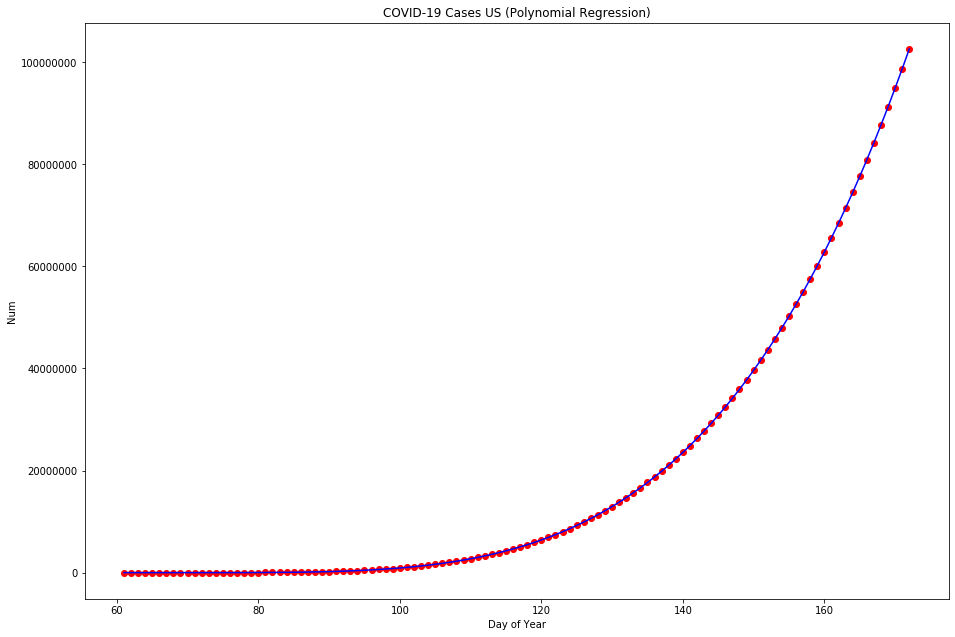

In [38]:
# Fitting Polynomial Regression to the dataset
poly_regf = PolynomialFeatures(degree=4)
x_polyf = poly_regf.fit_transform(xf)
pol_regf = LinearRegression()
pol_regf.fit(x_polyf, yf)

# Visualizing the Polymonial Regression results
def vizf_polymonial():
    fig = plt.figure(figsize=(15,10))
    axes = fig.add_axes([0.0,0.0,0.8,0.8])
    axes.scatter(xf, yf, color='red')
    axes.plot(xf, pol_regf.predict(poly_regf.fit_transform(xf)), color='blue')
    axes.ticklabel_format(useOffset=False, style='plain')
    plt.title('COVID-19 Cases US (Polynomial Regression)')
    plt.xlabel('Day of Year')
    plt.ylabel('Num')
    plt.show()
    return
vizf_polymonial()